In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [3]:
def build_generator():

    noise_shape = (100,) 

    model = Sequential()

    model.add(Dense(256,input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))
    
    model.load_weights('generator_model.h5')
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return model

In [4]:
optimizer = Adam(0.0002, 0.5) 

generator = build_generator()

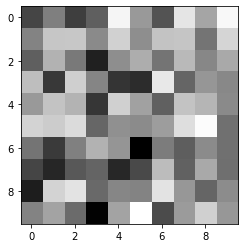

In [5]:
sample_noise=np.random.normal(0, 1, (1, 100))

plt.imshow(sample_noise.reshape(10,10),cmap='gray')

In [6]:
result=generator.predict(sample_noise)
print(result.shape)

(1, 28, 28, 1)


In [10]:
print(result[0,27,:,0])

[-0.80289525  0.21301456  0.50551707 -0.50701594 -0.69465125 -0.6002328
 -0.7056549   0.730748    0.20329067 -0.6635921   0.11376527  0.6252918
  0.87922543 -0.42378193  0.6397481   0.20986463  0.5498964  -0.40699762
  0.08676189 -0.53792083 -0.24107438 -0.38474068 -0.2971716  -0.04530723
  0.44699237  0.01095594  0.07039956  0.79696995]


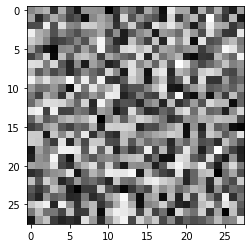

In [11]:
plt.imshow(result.reshape(28,28),cmap='gray')